<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

In [ ]:
#Same as previous notebook

# Step 2: Find the Data
## Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. WIlliam H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
columns = [
            'Index',
            'Clump Thickness',
            'Uniformity of Cell Size',
            'Uniformity of Cell Shape',
            'Marginal Adhesion',
            'Single Epithelial Cell Size',
            'Bare Nuclei',
            'Bland Chromatin',
            'Normal Nucleoli',
            'Mitoses',
            'Class']

df = pd.read_csv('../Data/breast-cancer-wisconsin-data-old.csv',
                 header = None,
                 names = columns,
                 usecols = columns[1:], #Use all cols but first one
                 na_values = '?' #Replace '?' with nan
                )

In [3]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
#Impute nan values:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#This iterative imputer bases y on all other columns in dataframe iteratively

imputer = IterativeImputer()

df.loc[:,'Bare Nuclei'] = imputer.fit_transform(df[['Bare Nuclei']])



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  699 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [7]:
from sklearn.model_selection import train_test_split

#Split data:

X = df.drop('Class', axis = 1)
y = df['Class']

#Normalize (Scale) data:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
            
X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [ ]:
#Use AdaBoost classifier for this lab
#Random forest but with stumps instead of trees (depth = 1)
#Higher weights are given to incorrectly classified samples
#Each stump learns from the previous one using these weights

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [ ]:
#Already done

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [10]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator = None,
                              n_estimators = 200) #Default is a stump 

adaboost.fit(X_train,y_train)

adaboost_predictions = adaboost.predict(X_test)

In [16]:
%%time

#Alternatively use GridSearchCV to find optimal parameters:

from sklearn.model_selection import GridSearchCV

adaboost_cv  = GridSearchCV(estimator = AdaBoostClassifier(),
                            param_grid = {'n_estimators' : [50,100,200],
                                          'learning_rate' : [0.3,0.5,0.8,1.0]}
                           )
adaboost_cv.fit(X_train,y_train)

adaboost_cv_predictions = adaboost_cv.predict(X_test)

Wall time: 9.11 s


In [15]:
#Check best parameters:

print('Best parameters for AdaBoost Classifier:', adaboost_cv.best_params_)

Best parameters for AdaBoost Classifier: {'learning_rate': 0.3, 'n_estimators': 200}


# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [33]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [31]:
print('Training accuracy score for AdaBoost without GridSearchCV:', adaboost.score(X_train,y_train))
print('Testing accuracy score for AdaBoost without GridSearchCV:', accuracy_score(y_test,adaboost_predictions))
print('\n')
print('Training accuracy score for AdaBoost with GridSearchCV:', adaboost_cv.score(X_train,y_train))
print('Testing accuracy score for AdaBoost with GridSearchCV:', accuracy_score(y_test,adaboost_cv_predictions))
#Score is high! Impressive since the random forest is only made up of stumps (weak learners)

Training accuracy score for AdaBoost without GridSearchCV: 1.0
Testing accuracy score for AdaBoost without GridSearchCV: 0.9437229437229437


Training accuracy score for AdaBoost with GridSearchCV: 0.9914529914529915
Testing accuracy score for AdaBoost with GridSearchCV: 0.948051948051948


In [34]:
#Evaluate the cross-validated AdaBoost Classifier:

print(classification_report(y_test, adaboost_cv_predictions))

              precision    recall  f1-score   support

           2       0.94      0.98      0.96       154
           4       0.96      0.88      0.92        77

    accuracy                           0.95       231
   macro avg       0.95      0.93      0.94       231
weighted avg       0.95      0.95      0.95       231



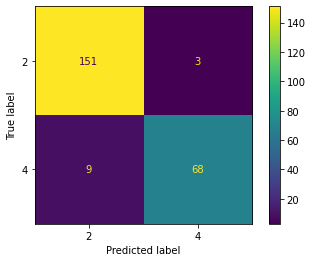

In [36]:
plot_confusion_matrix(estimator = adaboost_cv,
                      X = X_test,
                      y_true = y_test)

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

© 2020 Institute of Data